<a href="https://colab.research.google.com/github/testanalyst/AILaunchpad/blob/main/Assignment2_Day1_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_df = pd.read_csv(url, header=None, names=column_names)

In [15]:
# Remove the 'species' column since in unsupervisesd learning, the labels needn't be there and can be safely ignored
X = iris_df.drop(columns='species')
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#print(X_scaled)

In [25]:
# Apply K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
# An optimal value for k is unknown yet. We will first look at what n_clusters=k gives us
kmeans.fit(X_scaled)

# Print the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[ 0.33792373  0.18357969  0.60479835  0.62990161]
 [-0.96126511  0.92792589 -1.29577984 -1.20779835]
 [-0.10703162 -0.50677249  0.26802702  0.14637324]
 [ 0.90337379  0.18357969  1.00285828  1.3749151 ]
 [-0.54727488  2.01551983 -1.27019027 -1.214372  ]
 [ 0.98607567 -0.19107273  0.64090356  0.40556281]
 [-0.59776149 -1.55194255 -0.0286224  -0.08589567]
 [ 2.00734772  0.1905919   1.47099514  1.17305761]
 [-1.38535265 -0.03496756 -1.3381132  -1.33488889]
 [ 0.30342454 -1.1084202   0.72366347  0.74128843]]


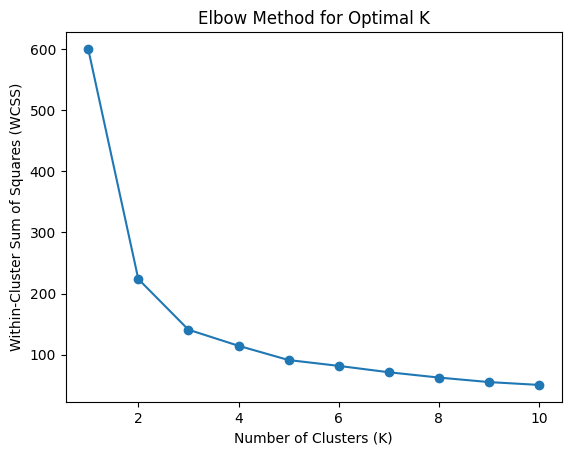

In [24]:
# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the WCSS vs. number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [26]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
# An optimal value for k is unknown yet. We will first look at what n_clusters=k gives us
kmeans.fit(X_scaled)

# Print the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]


In [27]:
cluster_labels = kmeans.fit_predict(X_scaled)

In [28]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Components (Principal Axes):\n", pca.components_)

Components (Principal Axes):
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


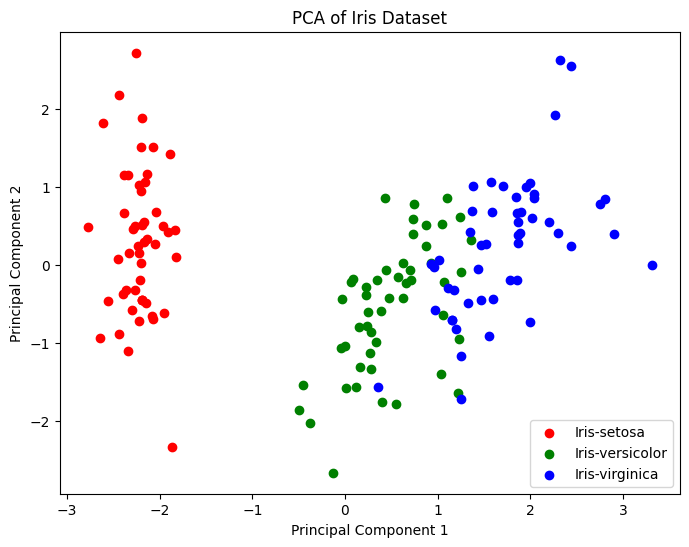

In [29]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['species'] = iris_df['species']

# Plot the PCA results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for color, species in zip(colors, species):
    indices = pca_df['species'] == species
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'], pca_df.loc[indices, 'Principal Component 2'], c=color, label=species)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4787241921049546


In [31]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 0.7868006762339902
